In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array(
    [
        [4.7],
        [2.4],
        [7.5],
        [7.1],
        [4.3],
        [7.816],
        [8.9],
        [5.2],
        [8.59],
        [2.1],
        [8],
        [10],
        [4.5],
        [6],
        [4],
    ],
    dtype=np.float32,
)

y_train = np.array(
    [
        [2.6],
        [1.6],
        [3.09],
        [2.4],
        [2.4],
        [3.357],
        [2.6],
        [1.96],
        [3.53],
        [1.76],
        [3.2],
        [3.5],
        [1.6],
        [2.5],
        [2.2],
    ],
    dtype=np.float32,
)

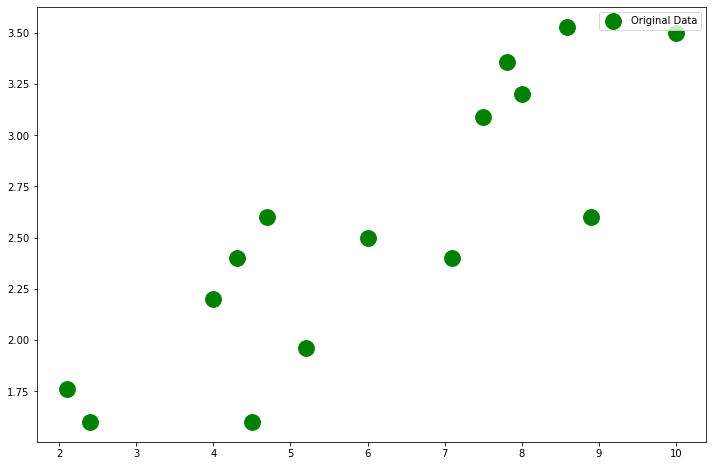

In [3]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label="Original Data", s=250, c='g')
plt.legend()
plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print("requires_grad for X train: ", X_train.requires_grad)
print("requires_grad for y_train: ", Y_train.requires_grad)

requires_grad for X train:  False
requires_grad for y_train:  False


In [6]:
input_size = 1
hidden_size = 1
output_size = 1

In [7]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [8]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True)
w2.shape

torch.Size([1, 1])

In [9]:
learning_rate = 1e-6

In [22]:
for iter in range(1, 3000):    # run loop for 10 iterations
    # perform a forward pass through the neural network constructed using a single linear neuron with no activation function
    y_pred = X_train.mm(w1).mm(w2)
    # get mean squared error loss for linear regression
    loss = (y_pred - Y_train).pow(2).sum()

    # for every 50 iterations, print out loss
    if iter % 50 == 0:
        print(iter, loss.item())

    # calculate gradient for model params
    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 8.0363187789917
100 7.500833511352539
150 7.035740852355957
200 6.632218360900879
250 6.282462120056152
300 5.979598522186279
350 5.717576503753662
400 5.49108362197876
450 5.295456886291504
500 5.126613616943359
550 4.980989456176758
600 4.855480194091797
650 4.747367858886719
700 4.654296875
750 4.574219226837158
800 4.505355358123779
850 4.446163177490234
900 4.3953046798706055
950 4.351626396179199
1000 4.314130783081055
1050 4.281949043273926
1100 4.254339218139648
1150 4.2306599617004395
1200 4.210361480712891
1250 4.192957401275635
1300 4.178041458129883
1350 4.165262699127197
1400 4.154315948486328
1450 4.1449408531188965
1500 4.136913776397705
1550 4.13004207611084
1600 4.1241583824157715
1650 4.119124889373779
1700 4.114816188812256
1750 4.111128330230713
1800 4.107975006103516
1850 4.105276584625244
1900 4.102967739105225
1950 4.10099458694458
2000 4.099307537078857
2050 4.097862720489502
2100 4.096627712249756
2150 4.095571517944336
2200 4.094668388366699
2250 4.09389781

In [23]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.3783]], requires_grad=True)
w2:  tensor([[1.0464]], requires_grad=True)


In [24]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [25]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8604],
        [0.9500],
        [2.9686],
        [2.8103],
        [1.7020],
        [3.0937],
        [3.5228],
        [2.0583],
        [3.4001],
        [0.8312],
        [3.1666],
        [3.9582],
        [1.7812],
        [2.3749],
        [1.5833]], grad_fn=<MmBackward0>)

In [26]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8603536],
       [0.9499679],
       [2.9686496],
       [2.8103216],
       [1.7020259],
       [3.0937288],
       [3.5227973],
       [2.0582635],
       [3.4000933],
       [0.8312218],
       [3.1665595],
       [3.9581995],
       [1.7811898],
       [2.3749197],
       [1.5832797]], dtype=float32)

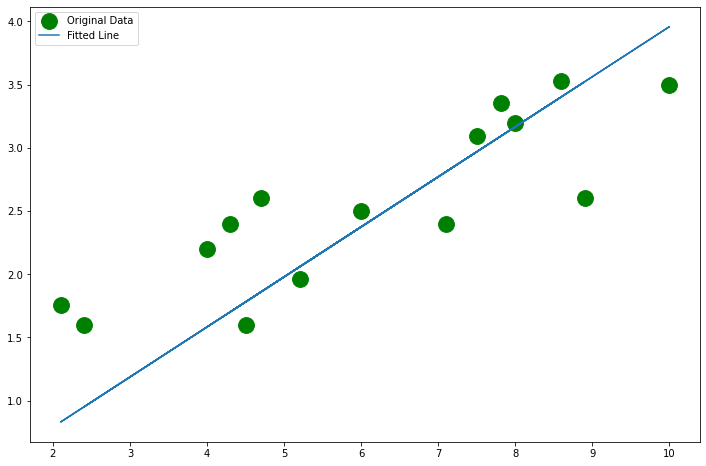

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label="Original Data", s=250, c='g')
plt.plot(x_train, predicted, label="Fitted Line")
plt.legend()
plt.show()